# 拡散モデルにおける熱力学的不確定性(TUR)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 変更点
A=-beta_t*x に修正した

## データ

数字画像MNISTの学習過程の各エポックで生成を行ったもの

In [6]:
TUR_log=pd.read_csv("TUR_log.csv",index_col=False)
TUR_log

epoch  gen_step  entropy production(LHS)        mean            var  \
0         0         0                62.217792 -114.689133   53404.203125   
1         0         1                65.162611 -234.827164  223863.406250   
2         0         2                63.070077 -333.733917  452033.093750   
3         0         3                64.054005 -354.231598  509284.125000   
4         0         4                62.533479   38.872971    6122.692383   
...     ...       ...                      ...         ...            ...   
9975     19       494                 2.822253   -0.006761       0.000047   
9976     19       495                 2.545868    0.058095       0.000673   
9977     19       496                 1.917233    0.047677       0.000012   
9978     19       497                 1.698793   -0.063229       0.000118   
9979     19       498                 1.500804    0.001478       0.000065   

             RHS     LHS/RHS        mean.1         var.1     RHS.1  ...  \
0       0.492605  126.303539  5.267374e+05  9.546326e+12  0.058128  ...   
1       0.492656  132.268043  2.208142e+06  3.550354e+13  0.274671  ...   
2       0.492788  127.986128  4.458570e+06  6.159103e+13  0.645511  ...   
3       0.492770  129.987575  5.023422e+06  6.849927e+13  0.736789  ...   
4       0.493609  126.686282  6.039767e+04  1.165747e+12  0.006258  ...   
...          ...         ...           ...           ...       ...  ...   
9975    1.941773    1.453441  1.570678e-04  1.474460e-05  0.003346  ...   
9976   10.025707    0.253934  4.020861e-03  5.636194e-04  0.057370  ...   
9977  366.661202    0.005229  2.670939e-04  2.852464e-04  0.000500  ...   
9978   67.705523    0.025091  1.809729e-03  4.519260e-04  0.014494  ...   
9979    0.067546   22.218980 -2.726311e-05  6.544231e-06  0.000227  ...   

           RHS.2   LHS/RHS.2       mean.3         var.3      RHS.3  \
0       0.492608  126.302828  1759.212158  1.253278e+07   0.493877   
1       0.492658  132.267419  7887.379395  2.523686e+08   0.493015   
2       0.492791  127.985509   192.861603  1.517419e+05   0.490248   
3       0.492773  129.986948 -6189.140137  1.554622e+08   0.492794   
4       0.493607  126.686668 -4630.151367  8.704215e+07   0.492596   
...          ...         ...          ...           ...        ...   
9975    1.946129    1.450188    -3.869574  1.717377e+00  17.437763   
9976   10.039721    0.253580    -1.688446  1.231825e+00   4.628660   
9977  366.516214    0.005231     1.620298  8.670441e-02  60.559017   
9978   67.656248    0.025109     2.145438  2.014897e+00   4.568871   
9979    0.066623   22.526813     2.483709  2.552747e+00   4.833075   

       LHS/RHS.3        mean.4         var.4     RHS.4   LHS/RHS.4  
0     125.978300  1.846131e+08  3.105174e+17  0.219517  283.429941  
1     132.171641  1.808182e+08  2.978821e+17  0.219518  296.844241  
2     128.649253  1.804057e+08  2.965250e+17  0.219517  287.312339  
3     129.981211  1.841722e+08  3.090357e+17  0.219518  291.794147  
4     126.946821  1.917038e+08  3.348269e+17  0.219518  284.866726  
...          ...           ...           ...       ...         ...  
9975    0.161847  6.794776e+00  2.799869e+01  3.297939    0.855762  
9976    0.550023  6.410374e+00  2.480803e+01  3.312870    0.768478  
9977    0.031659  5.537748e+00  1.676098e+01  3.659291    0.523936  
9978    0.371819  6.116320e+00  1.982066e+01  3.774785    0.450037  
9979    0.310528  7.065071e+00  2.937106e+01  3.398940    0.441551  

[9980 rows x 23 columns]

### 学習ステップ数epochと生成ステップ数generate_num

取得した観測変数4種類


0: RHS (x+xo)/2

1: (x+xo)/2*(x-xo)

2: x =mean(x)

3: x[0,0,0]

4: var(x)

In [9]:
epochs=20
generate_num=500
labels=["RHS (x+xo)/2","(x+xo)/2*(x-xo)","x","x[0,0,0]"]

In [10]:
TUR_log.columns

Index(['epoch', 'gen_step', 'entropy production(LHS)', 'mean', 'var', 'RHS',
       'LHS/RHS', 'mean.1', 'var.1', 'RHS.1', 'LHS/RHS.1', 'mean.2', 'var.2',
       'RHS.2', 'LHS/RHS.2', 'mean.3', 'var.3', 'RHS.3', 'LHS/RHS.3', 'mean.4',
       'var.4', 'RHS.4', 'LHS/RHS.4'],
      dtype='object')

$\sigma \ge \frac{2<R>^2}{<\Delta R^2>} $

$\sigma =\int dx \frac{{\bf J}^T D^{-1} {\bf J}}{P}$

## DDPMのエントロピー生成(左辺)

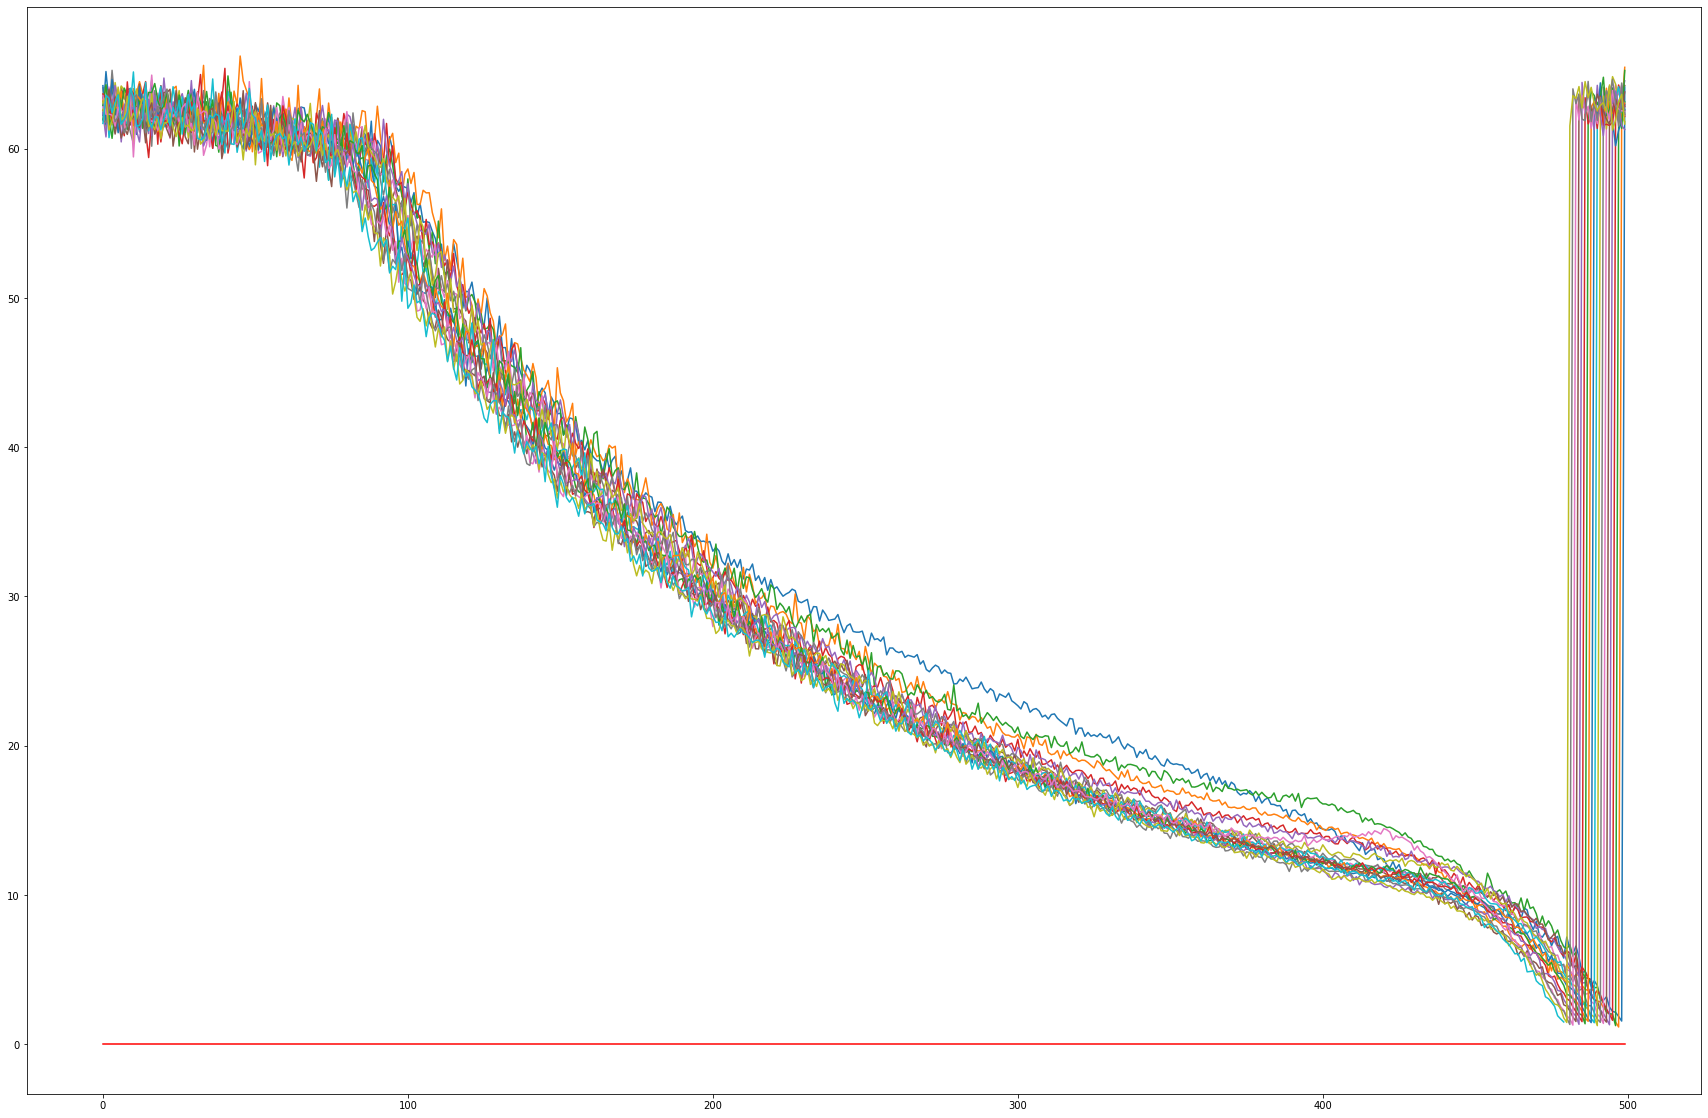

In [11]:
plt.figure(figsize=(30,20))
plt.plot([0]*generate_num,color='red')
for i in range(epochs):
    plt.plot(TUR_log["entropy production(LHS)"][i*generate_num:(i+1)*generate_num].values)

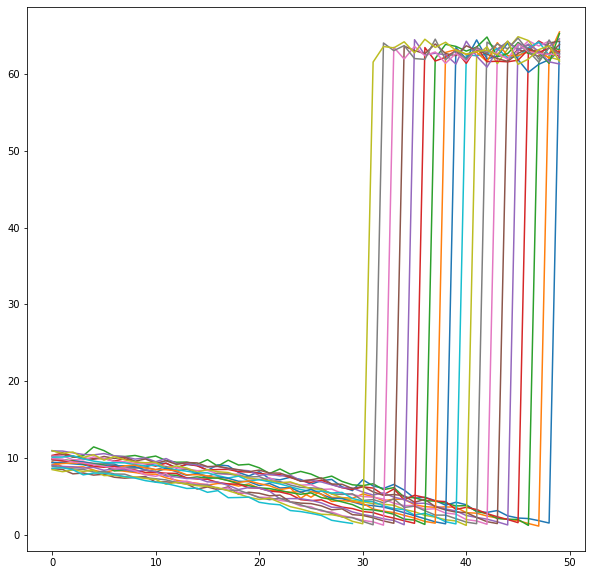

In [12]:
plt.figure(figsize=(10,10))
for i in range(epochs):
    plt.plot(TUR_log["entropy production(LHS)"][i*generate_num+450:(i+1)*generate_num].values)

最後20ステップくらいから値が飛ぶ

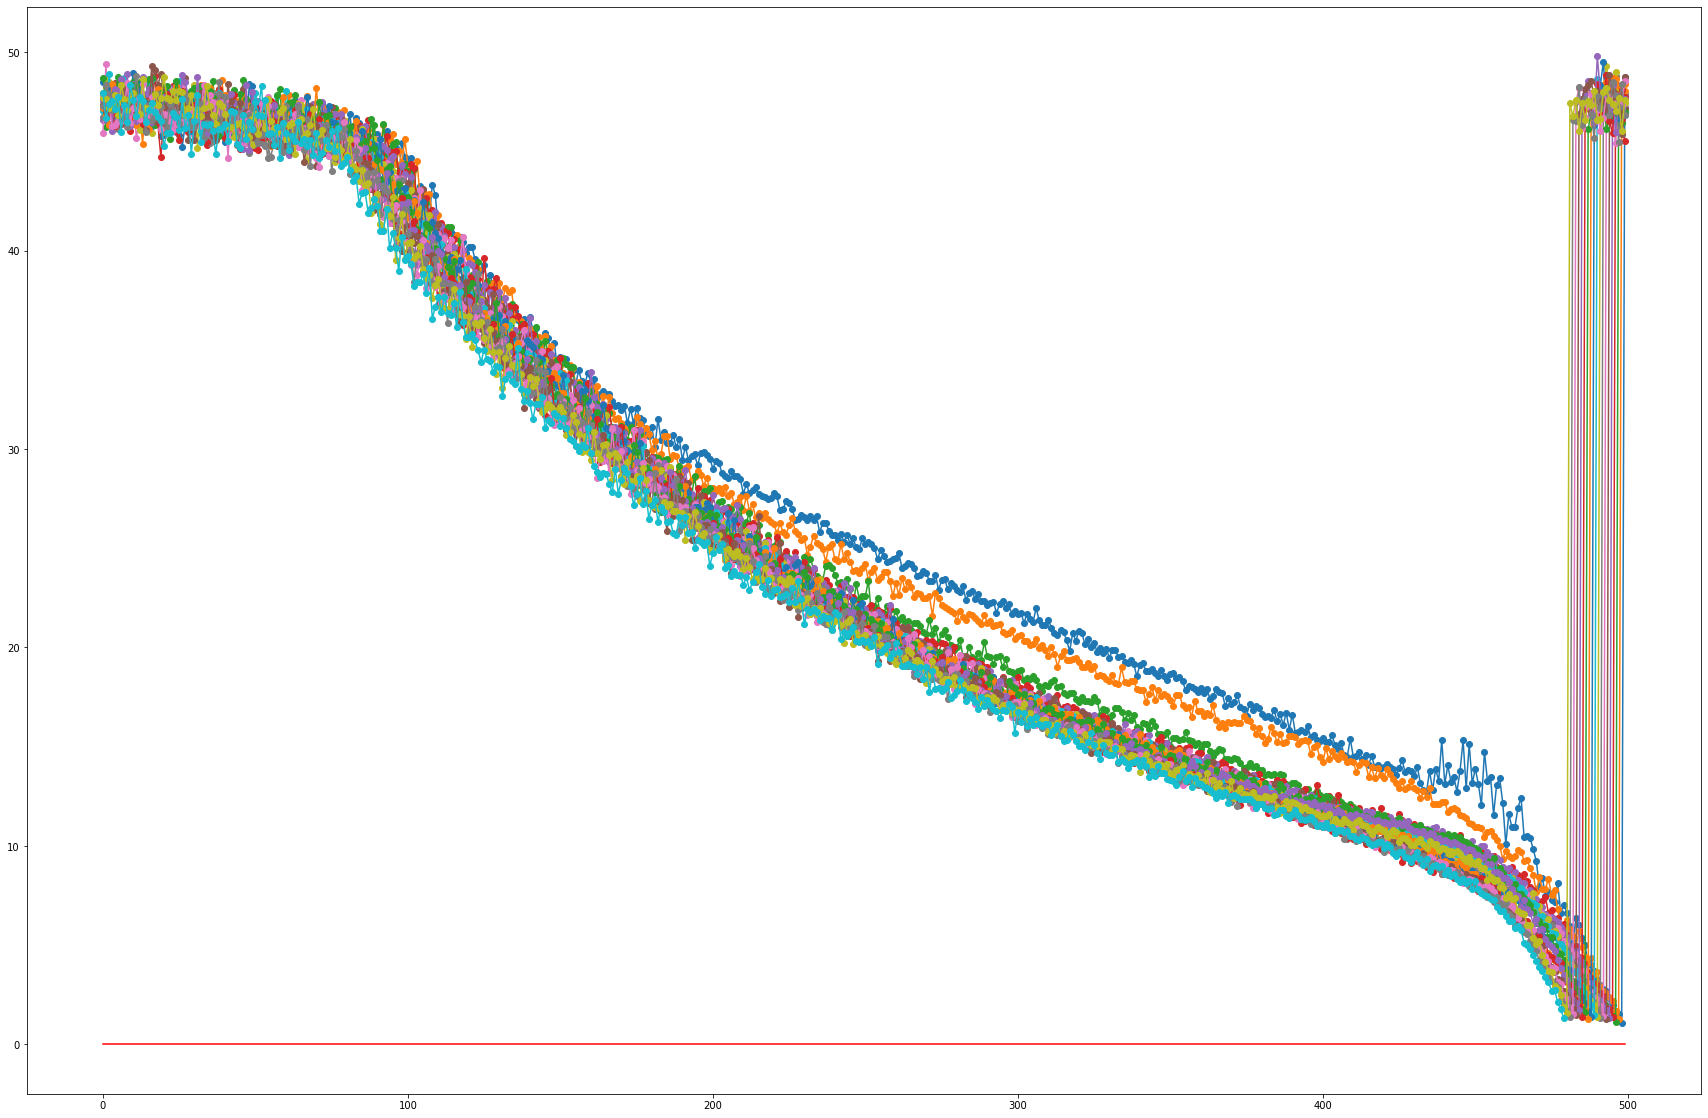

In [38]:
TUR_log_Aminus=pd.read_csv("TUR_log_Aminus.csv",index_col=False)
plot_generates(TUR_log_Aminus["entropy production(LHS)"])

In [13]:
#プロット用関数
def plot_generates(df,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(30,20))
    plt.plot([0]*generate_num,color='red')
    for i in range(epochs):
        q=df[i*generate_num:(i+1)*generate_num].values
        plt.plot(q,fmt)
    
def plot_generates_log(df,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(30,20))
    plt.plot([0]*generate_num,color='red')
    for i in range(epochs):
        q=df[i*generate_num:(i+1)*generate_num].values
        plt.plot(np.log(q),fmt)
    
    
def plot_per_epoch(df,islog=True,offset=0,generate_num=generate_num,fmt="o-"):
    plt.figure(figsize=(15,10))

    for i in range(10):        
        start=i*50+offset
        q=df[start::generate_num].values
        if(islog):
            q=np.log(q)       
        plt.plot(q,fmt,label=str(start))
        plt.legend(loc='upper right')
    plt.show()


## 各学習ステップ(エポック)における生成過程での取得量の推移を重ね書きしたもの

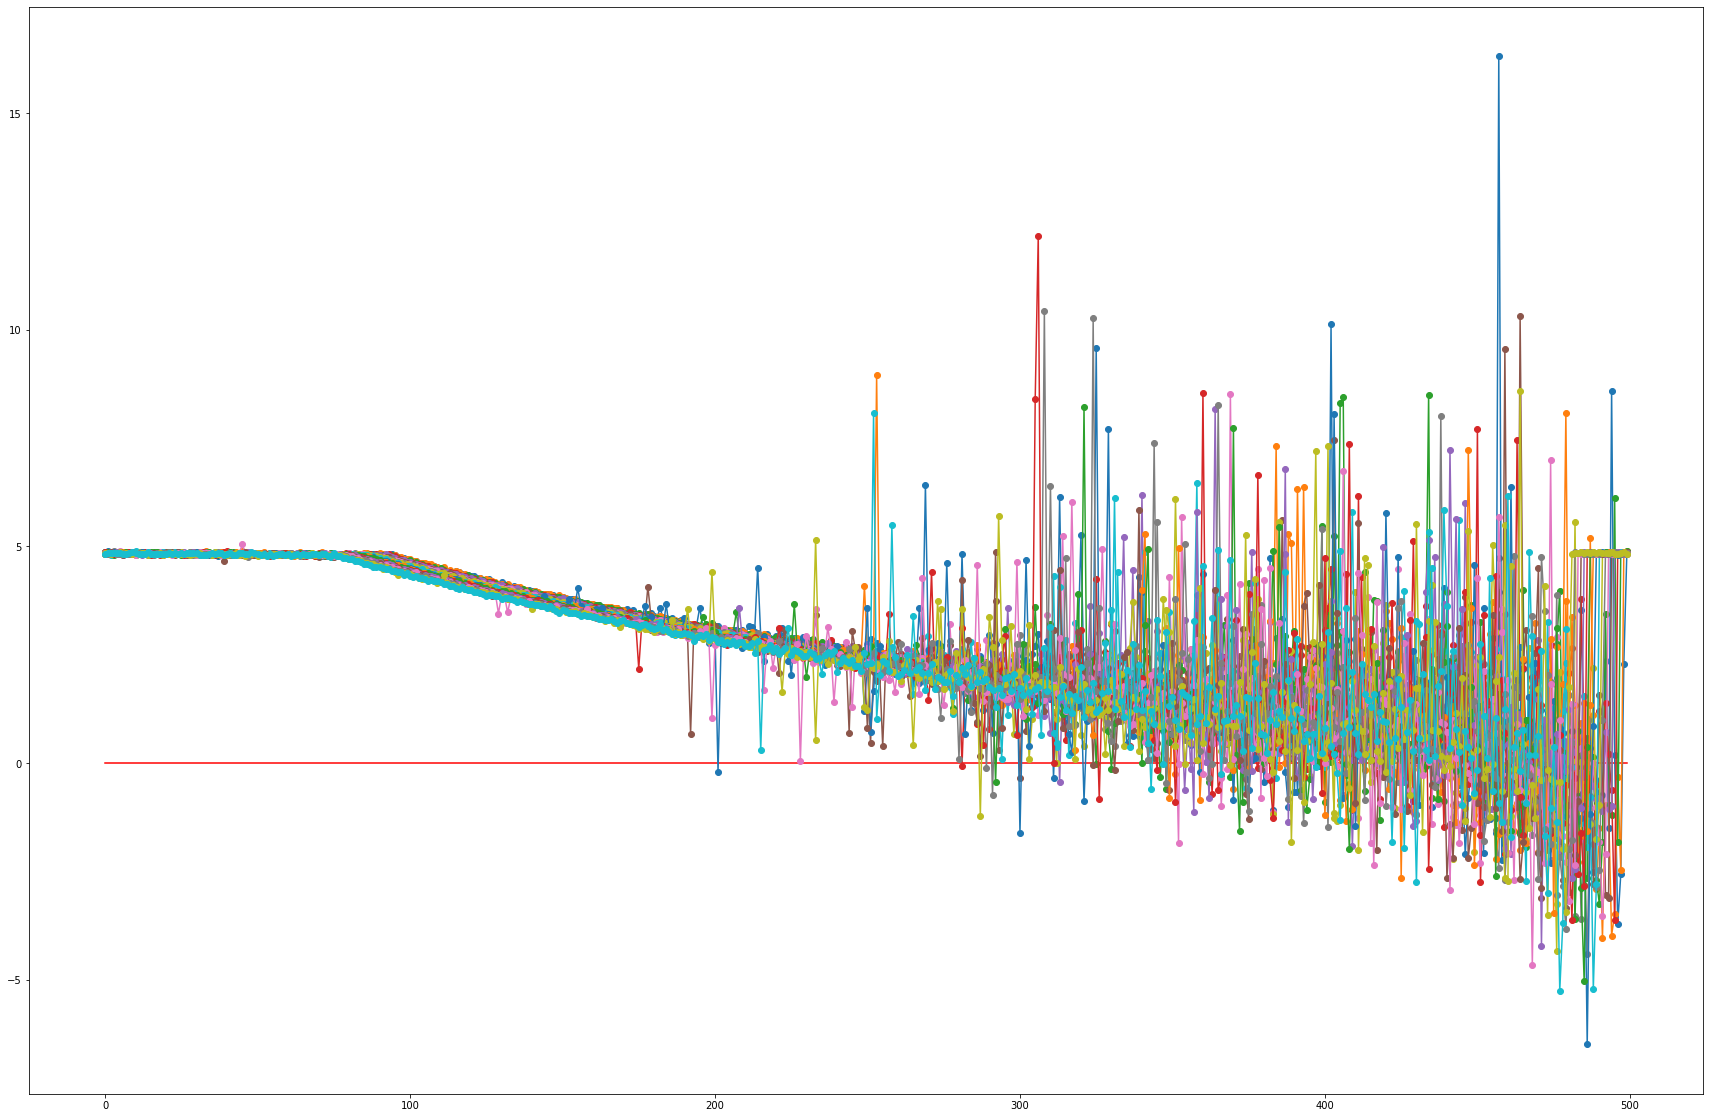

In [14]:
plot_generates_log(TUR_log["LHS/RHS"])

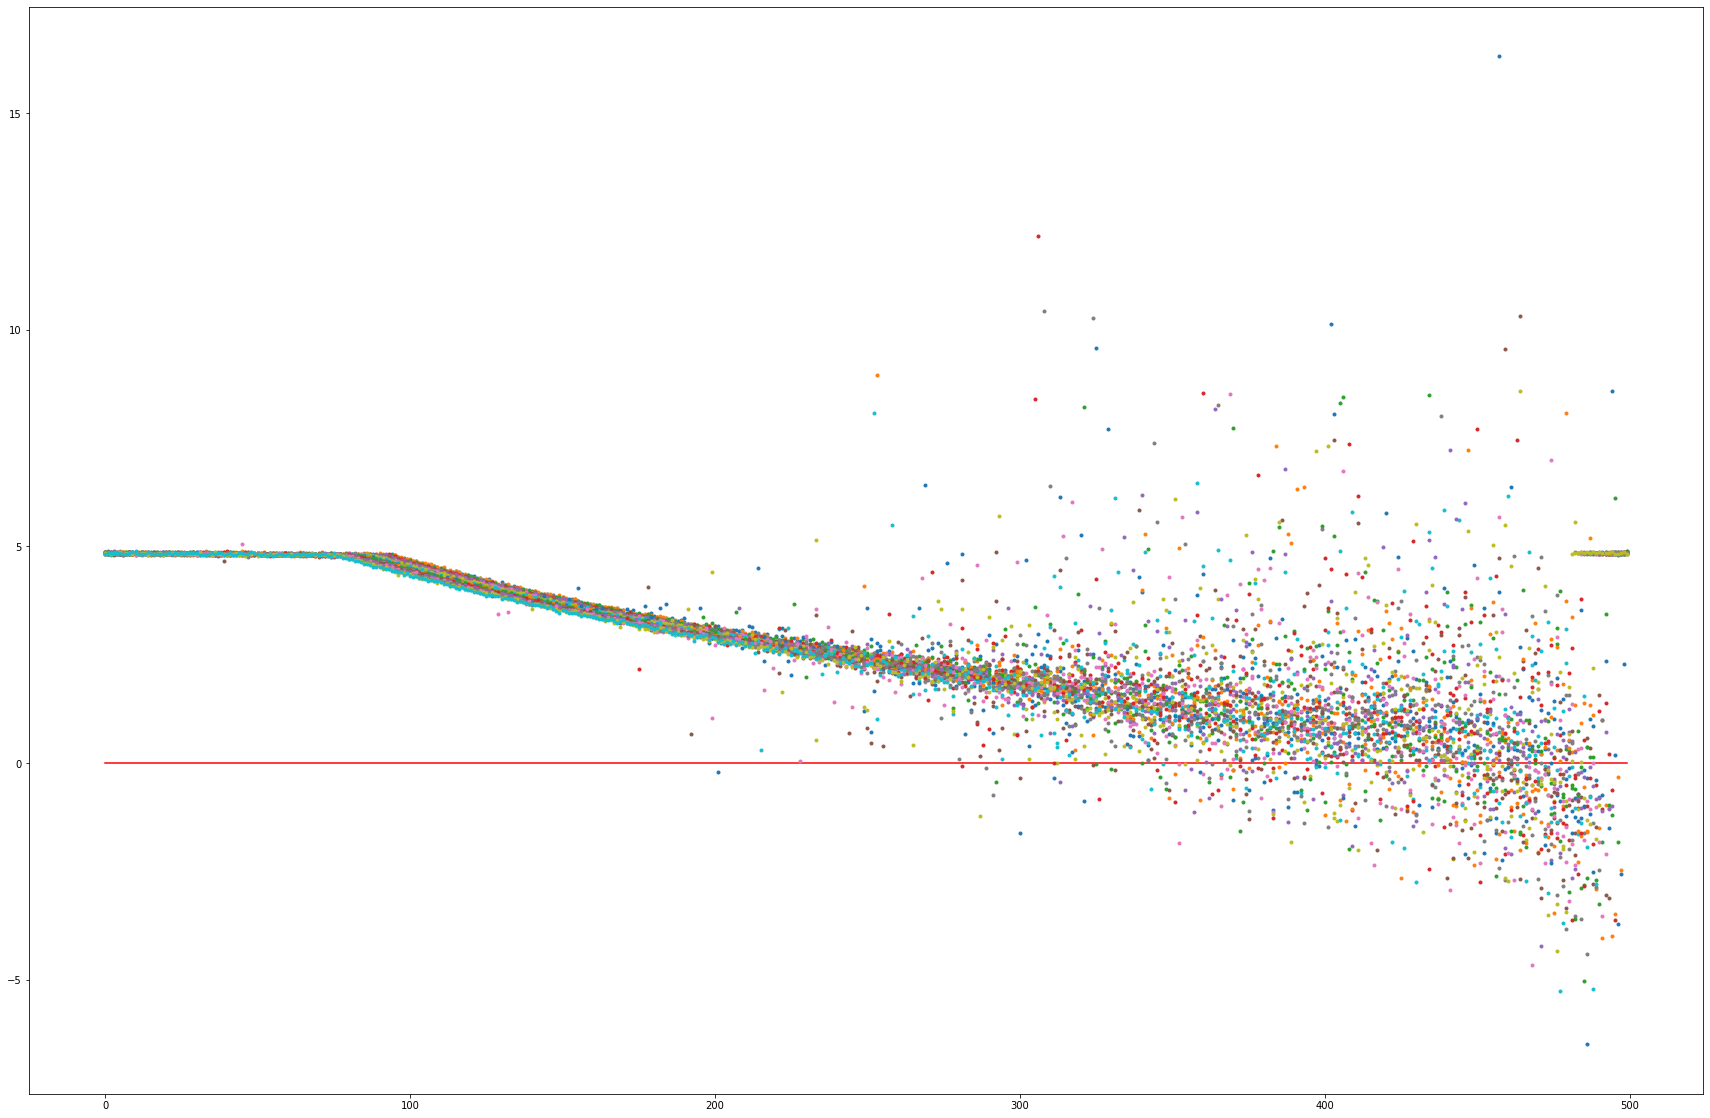

In [140]:
plot_generates_log(TUR_log["LHS/RHS"],fmt=".")

LHS/RHS.1
LHS/RHS.2
LHS/RHS.3


/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(q),fmt)
/tmp/ipykernel_403975/2887377677.py:14: RuntimeWarning: invalid value encountere

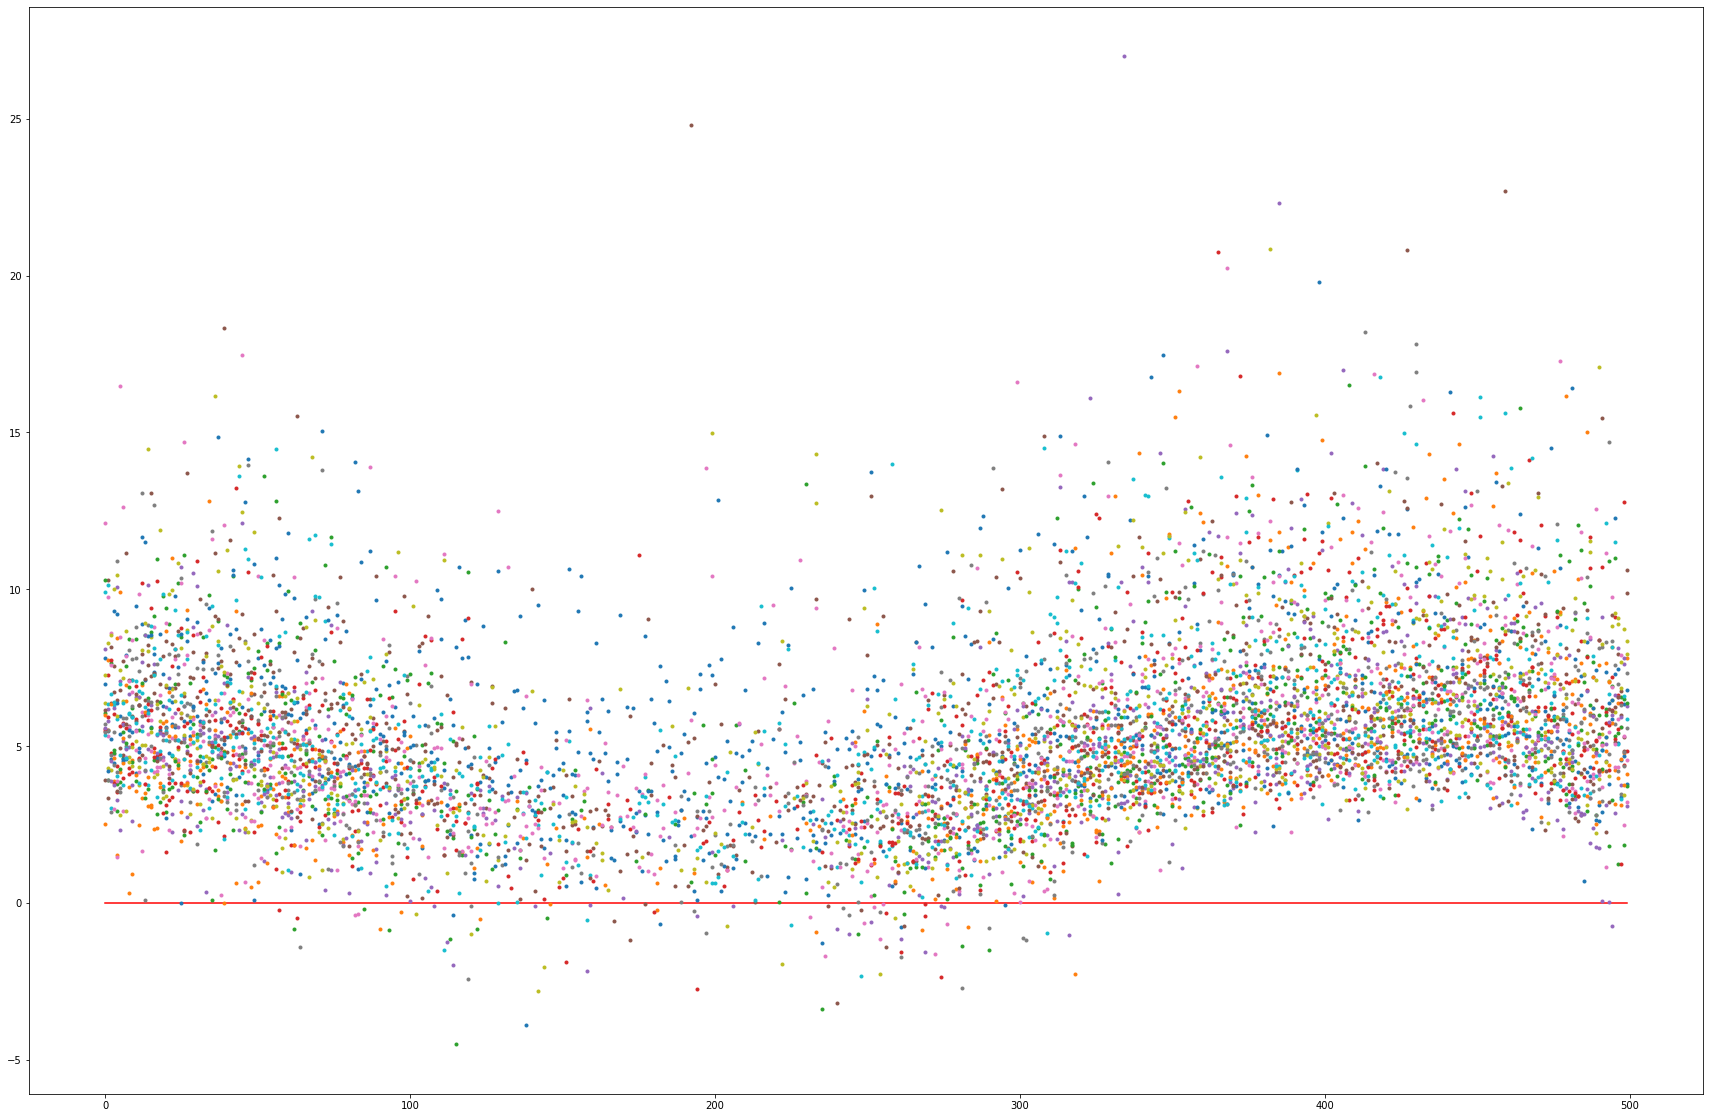

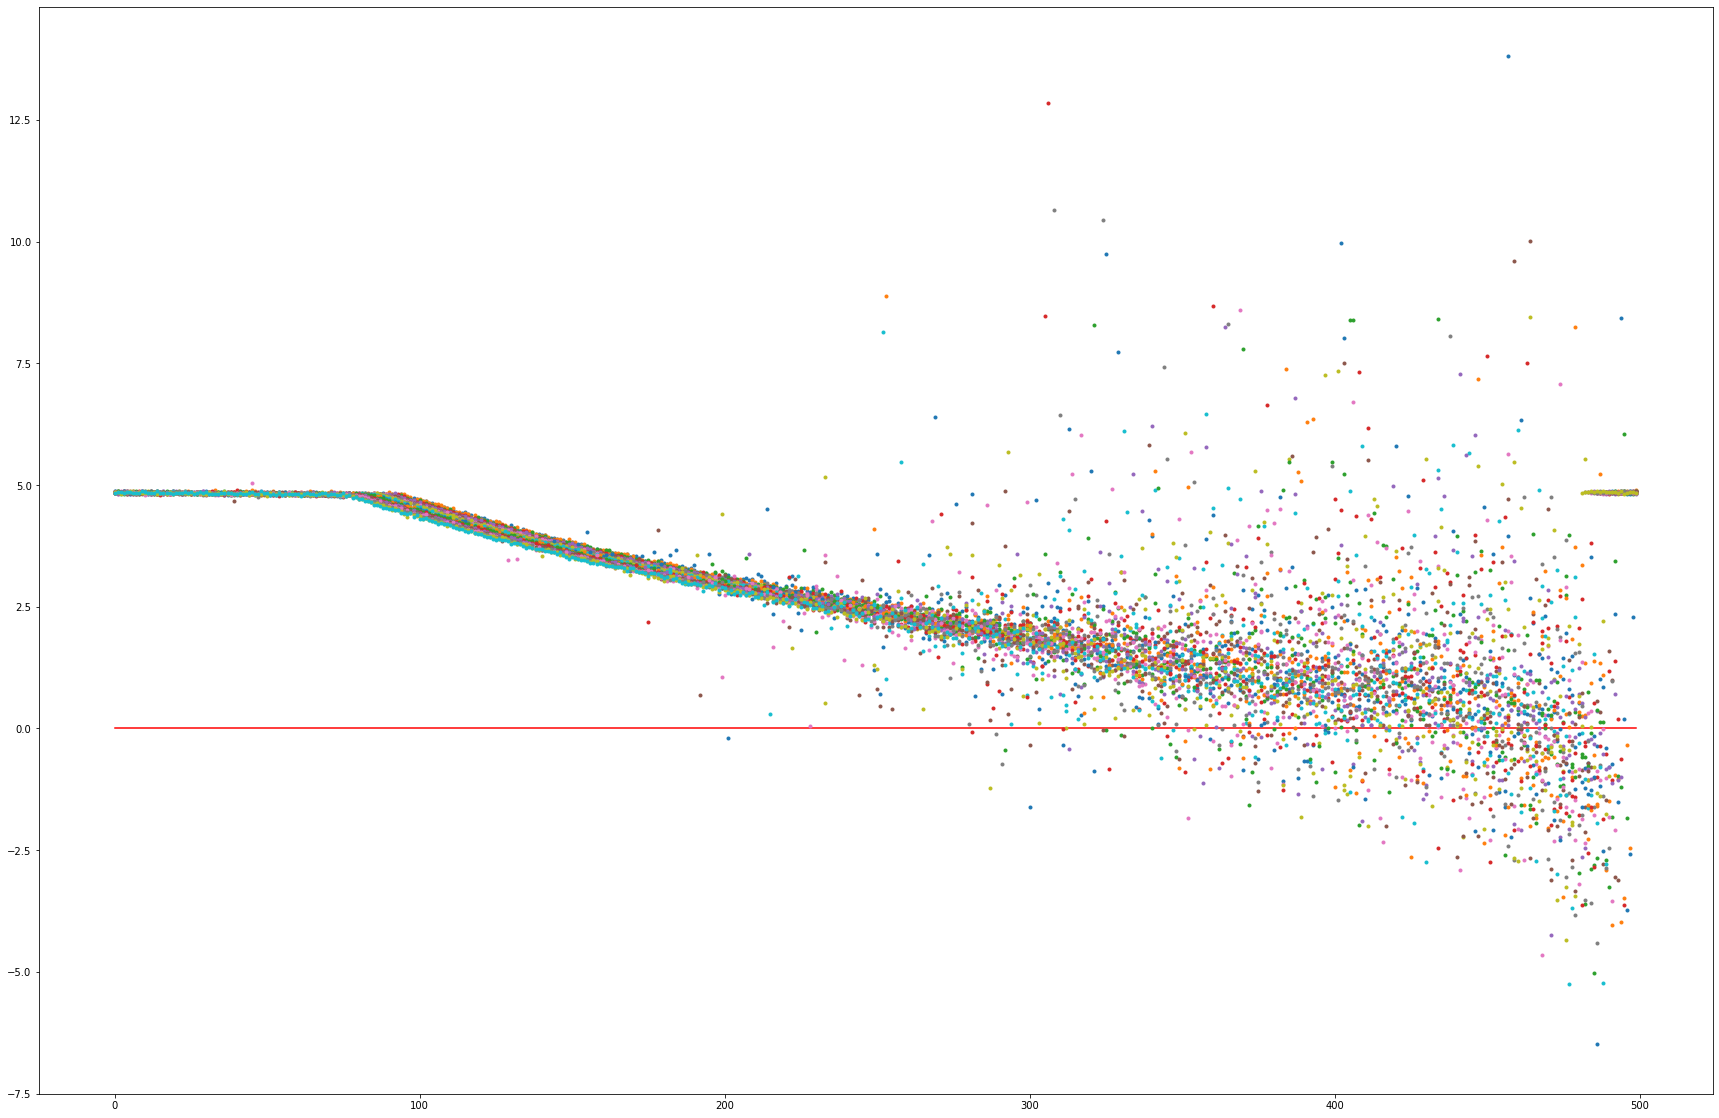

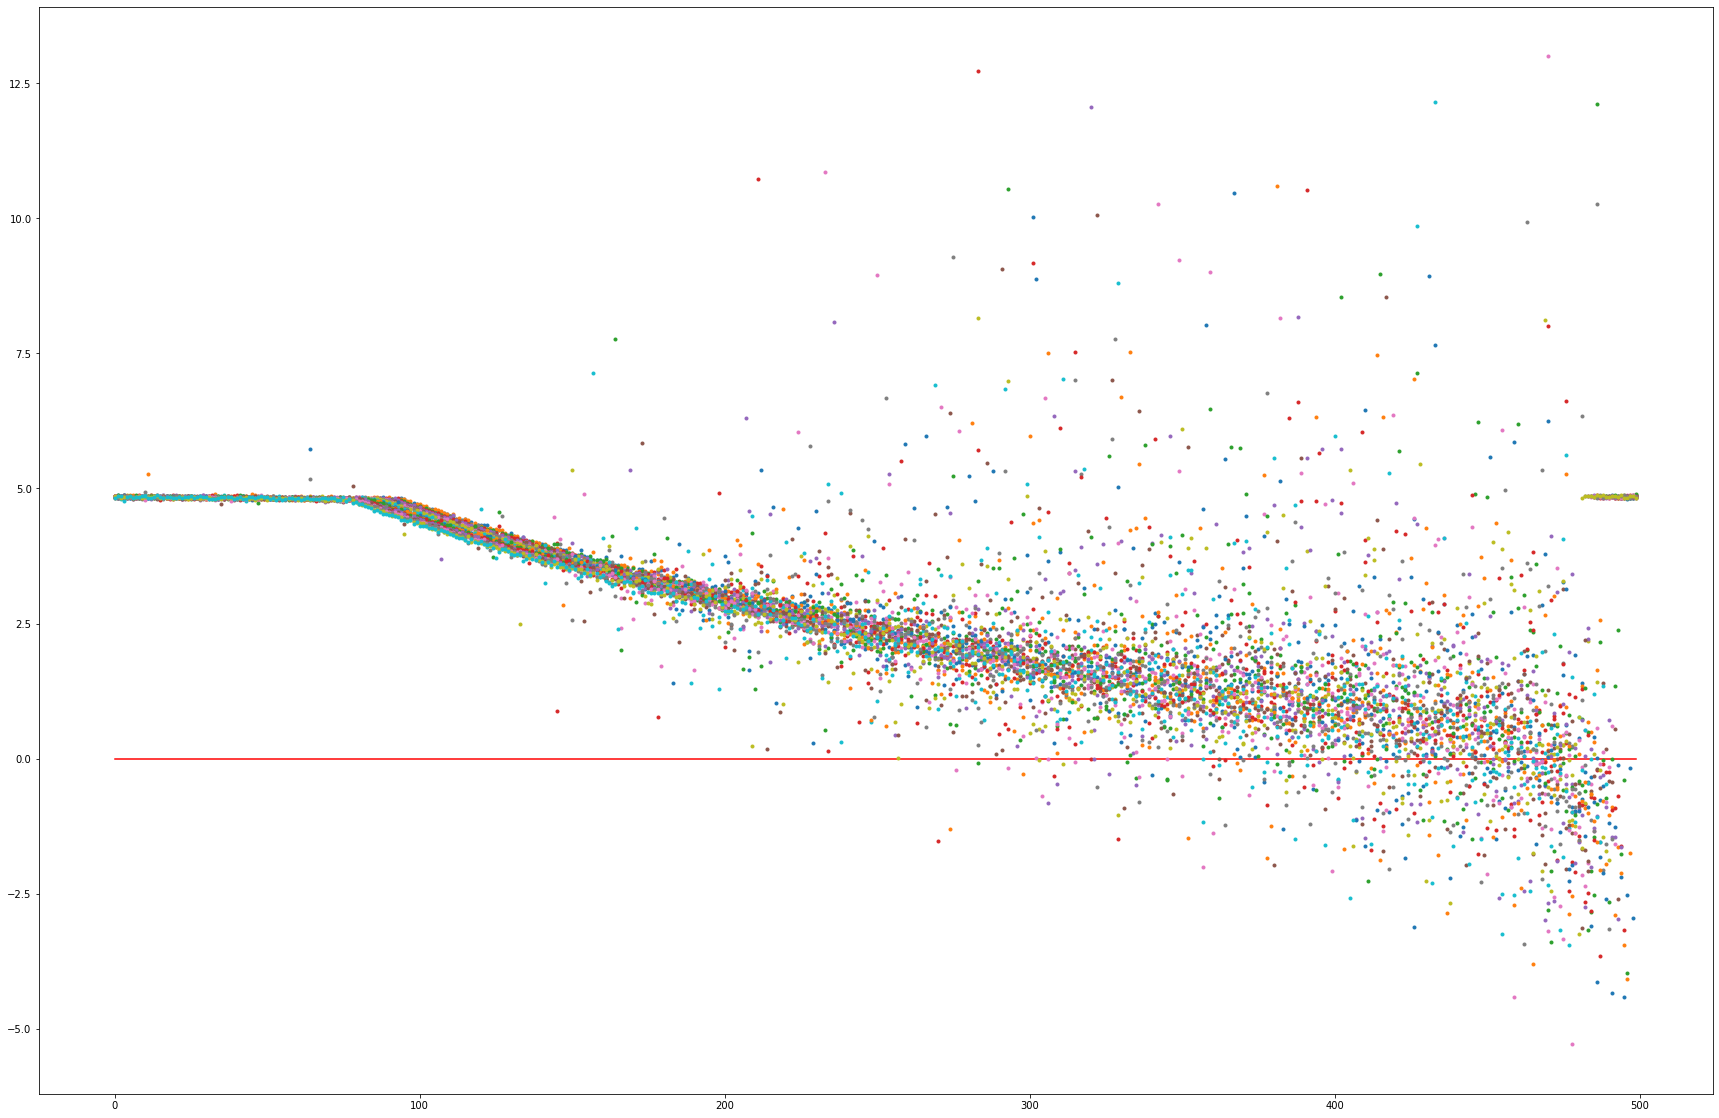

In [23]:
for i in range(1,4):
    title="LHS/RHS."+str(i)
    print(title)
    plot_generates_log(TUR_log[title],fmt=".")
    #plt.title(title)


## 生成ステップ番号を固定した場合の取得量の学習ステップ(エポック)に対する変化

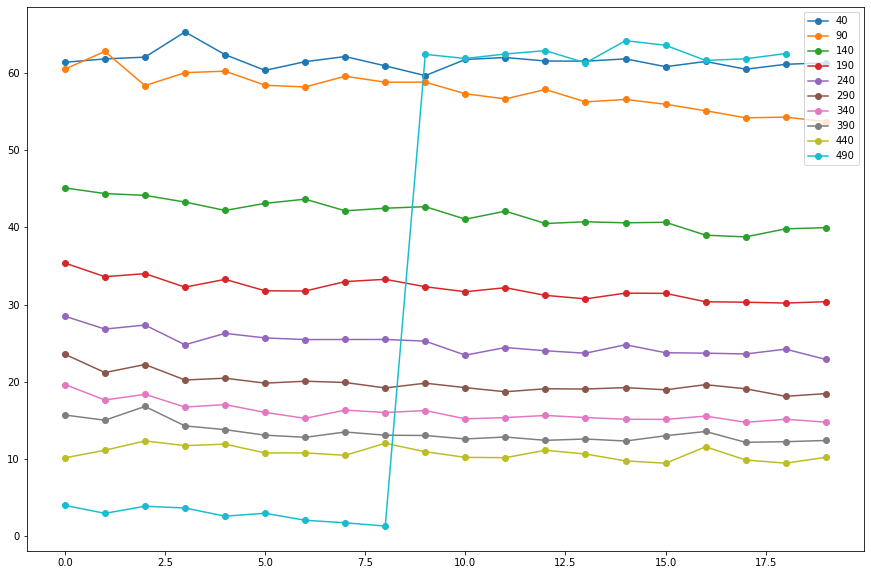

In [19]:
plot_per_epoch(TUR_log["entropy production(LHS)"],islog=False,offset=40)   

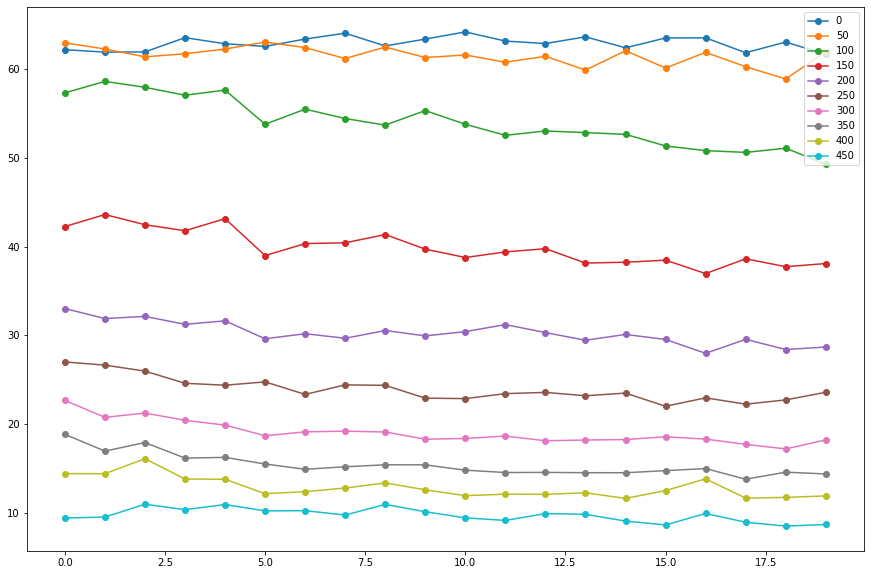

In [20]:
plot_per_epoch(TUR_log["entropy production(LHS)"],islog=False)

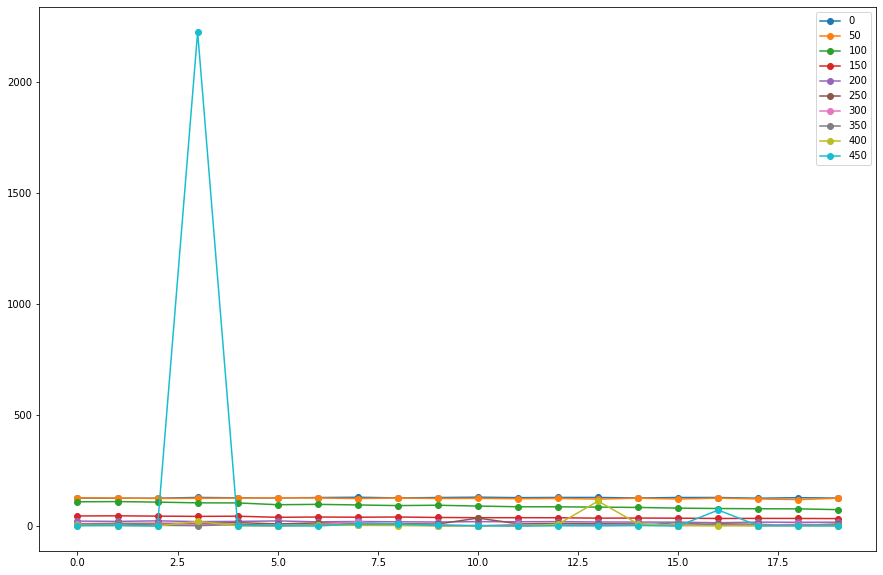

In [24]:
plot_per_epoch(TUR_log["LHS/RHS"],islog=False,offset=0)

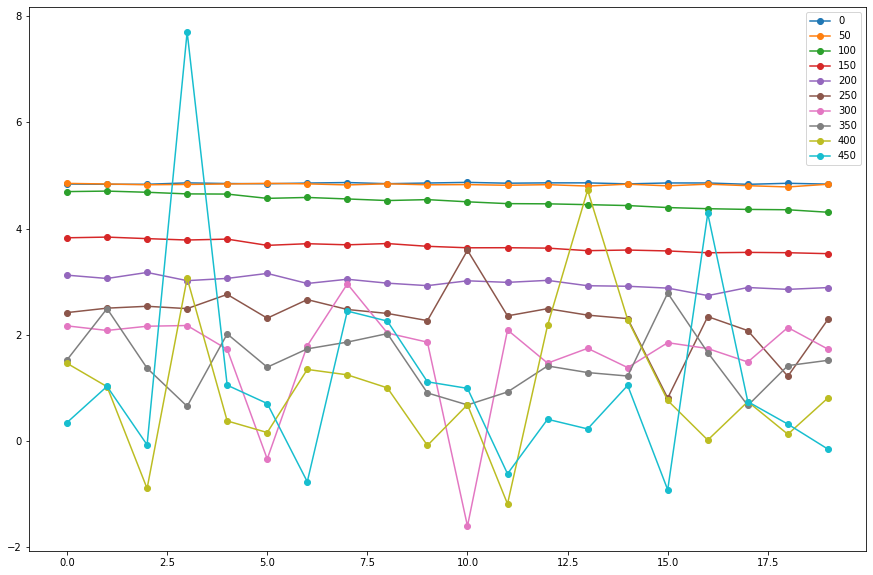

In [25]:
plot_per_epoch(TUR_log["LHS/RHS"],offset=0)

/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)
/tmp/ipykernel_403975/2887377677.py:24: RuntimeWarning: invalid value encountered in log
  q=np.log(q)


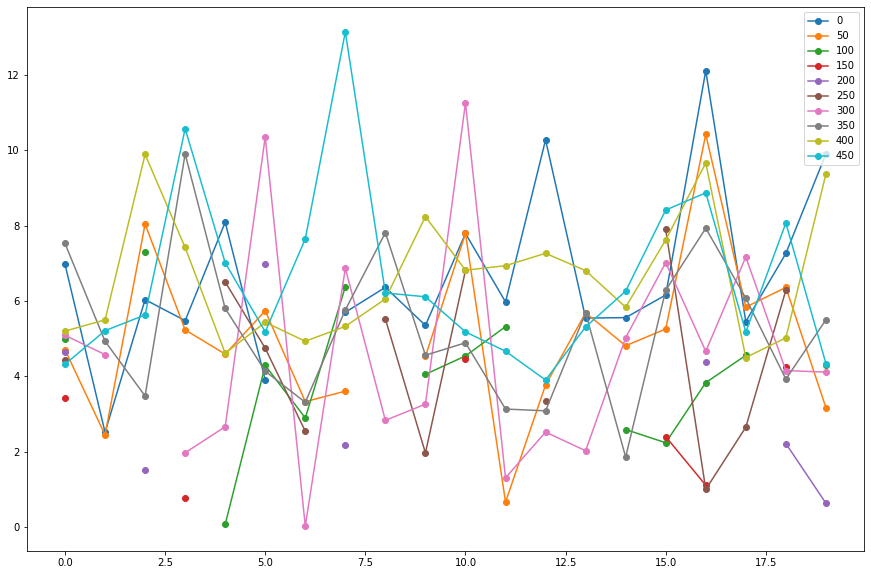

In [26]:
plot_per_epoch(TUR_log["LHS/RHS.1"],offset=0)

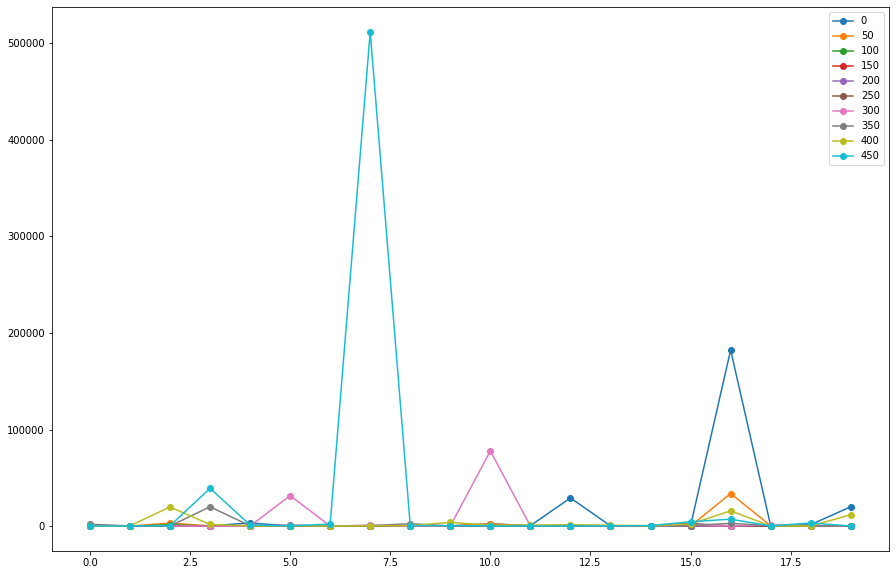

In [27]:
plot_per_epoch(TUR_log["LHS/RHS.1"],islog=False,offset=0)

## 右辺の量のプロット

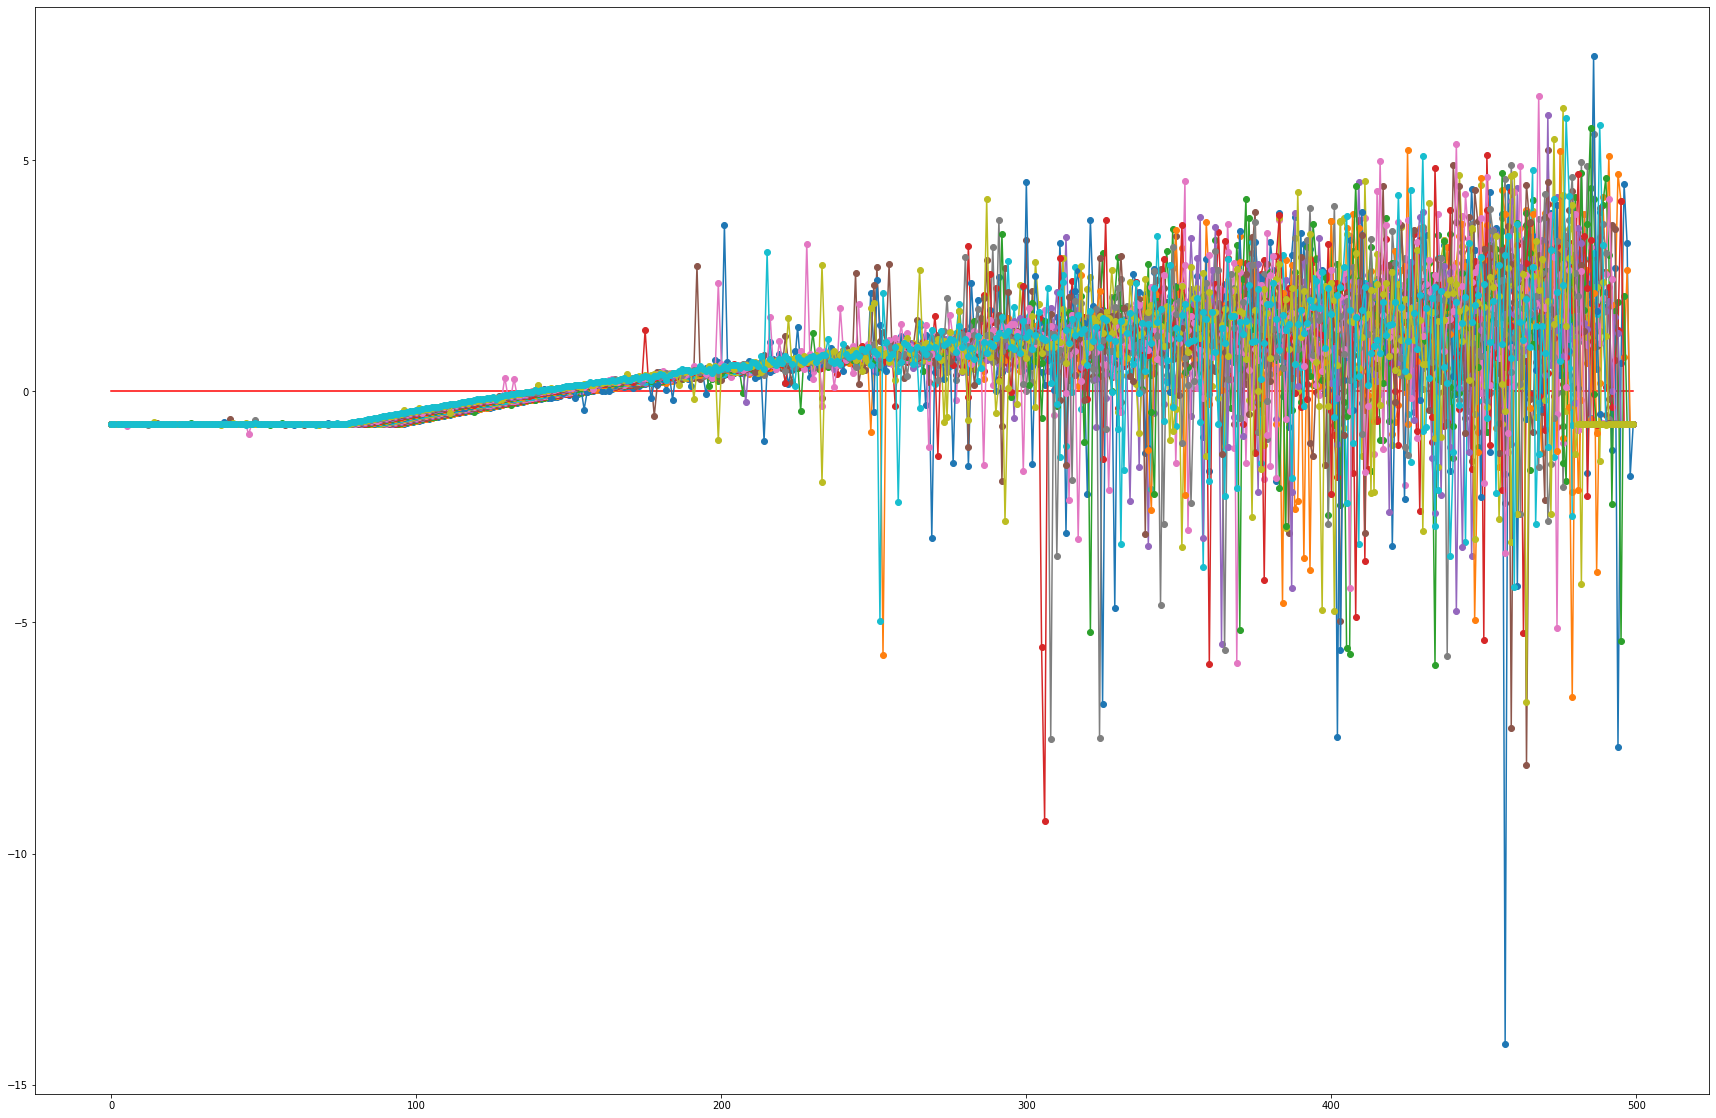

In [28]:
#plot_generates_log(TUR_log["2*mean^2/var (RHS)"])
plot_generates_log(TUR_log["RHS"])

### 統計量のプロット

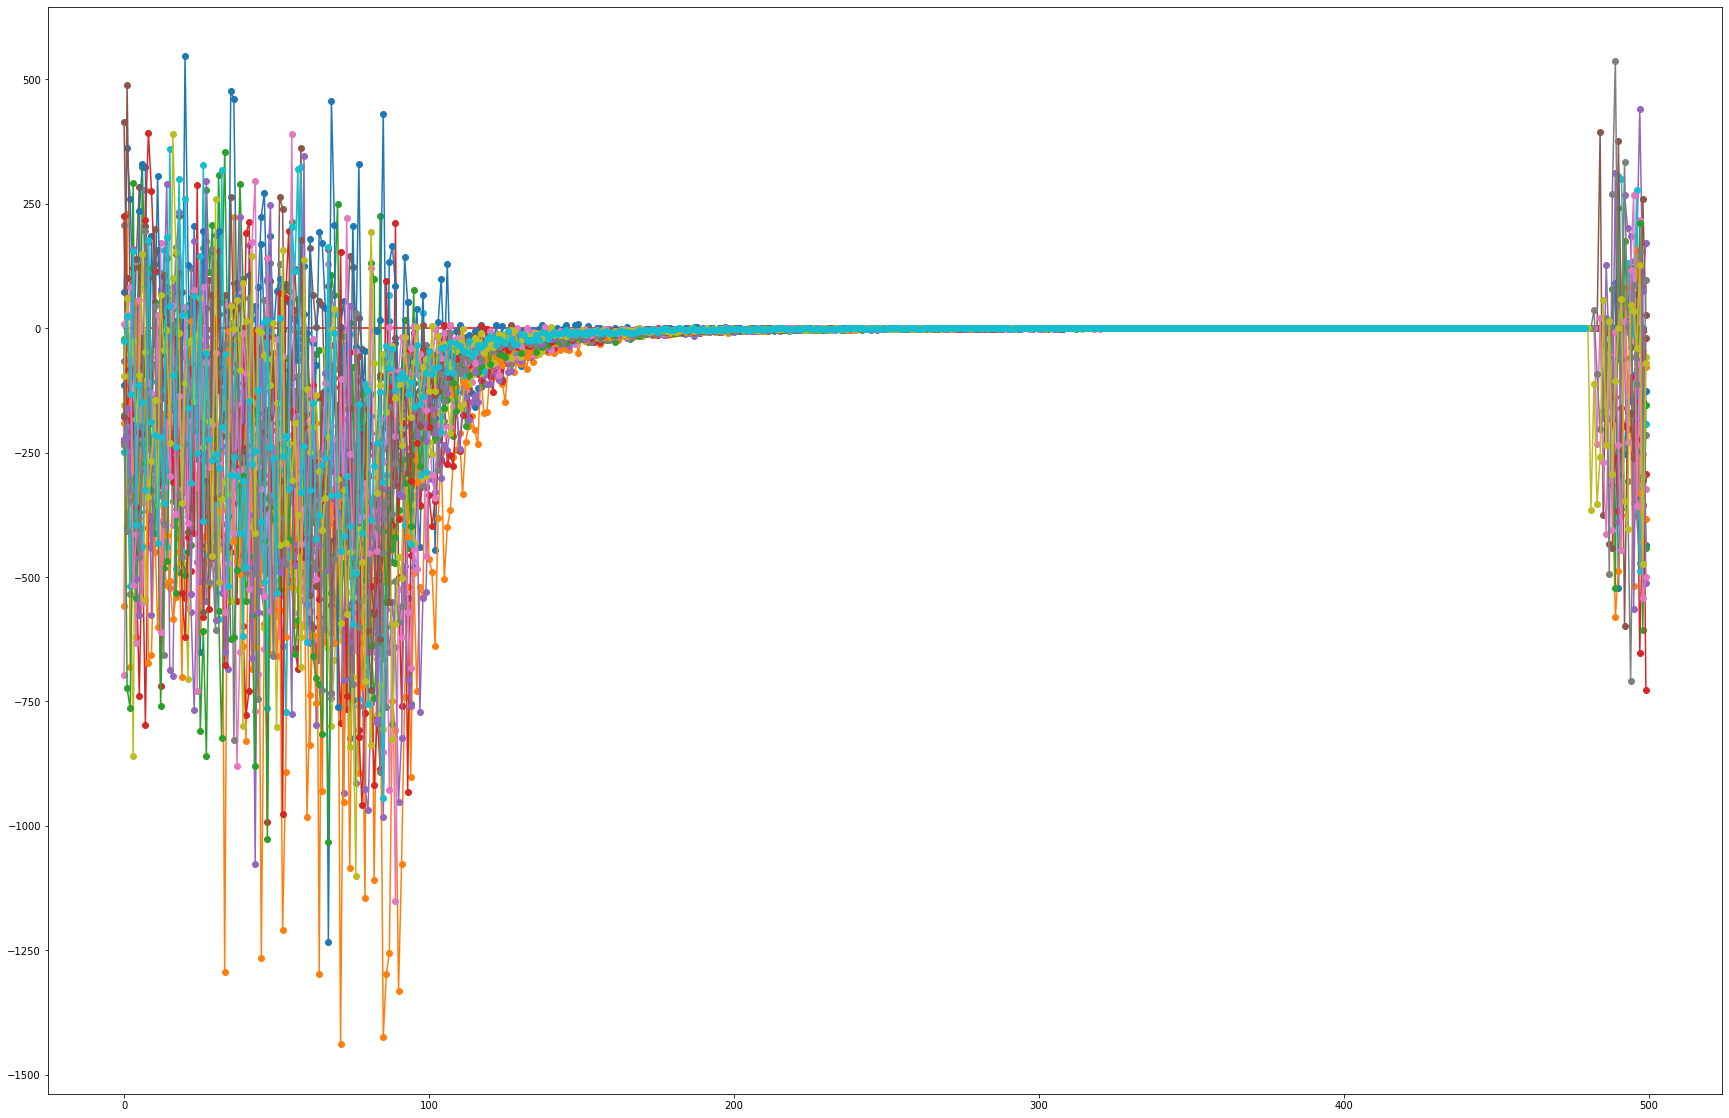

In [29]:
plot_generates(TUR_log["mean"])

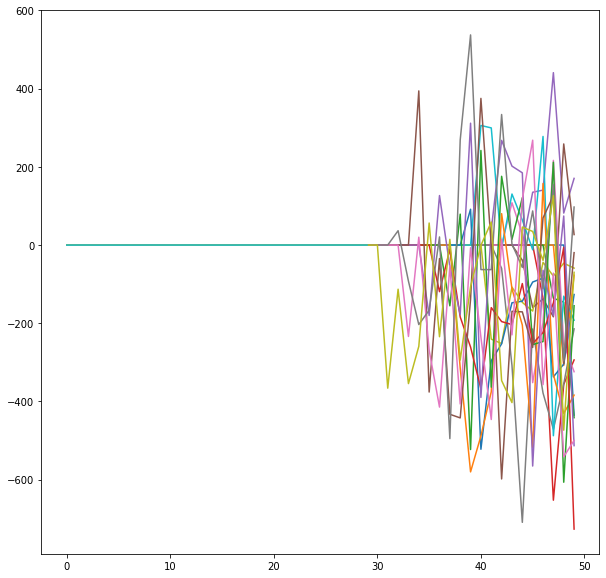

In [30]:
plt.figure(figsize=(10,10))
for i in range(epochs):
    plt.plot(TUR_log["mean"][i*generate_num+450:(i+1)*generate_num].values)
    

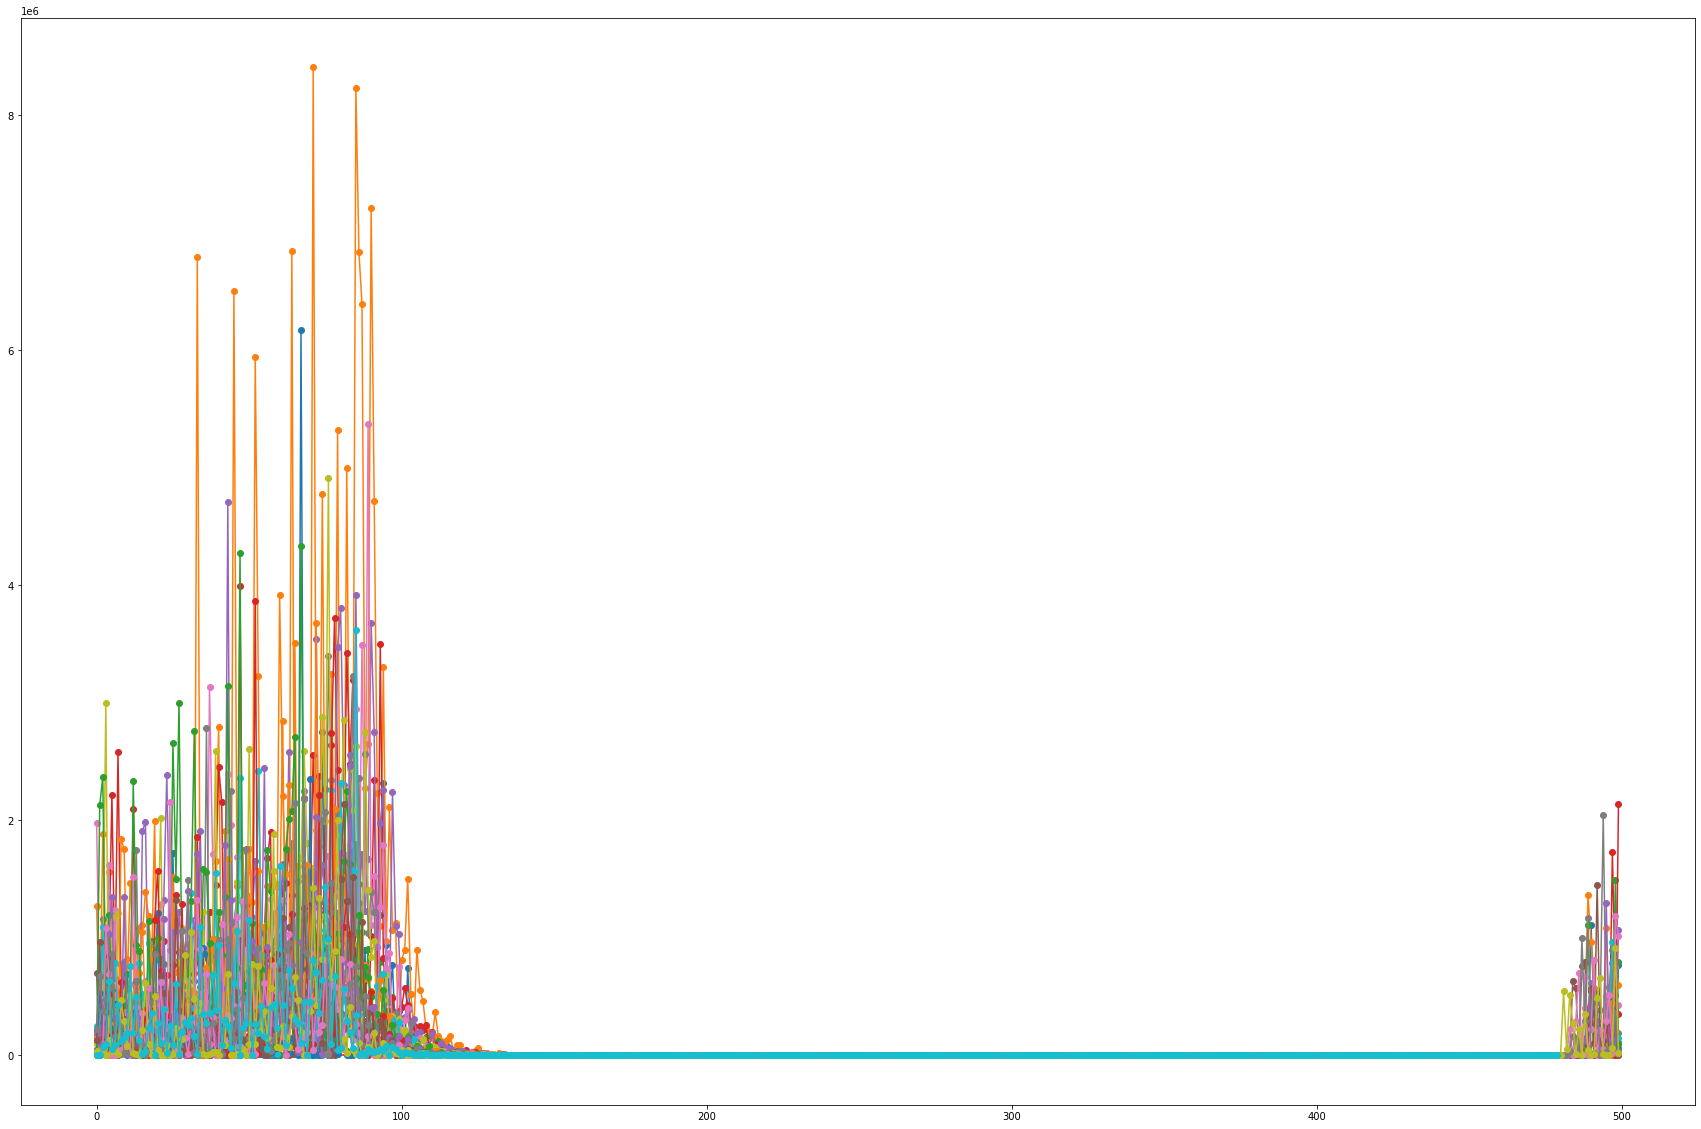

In [31]:
plot_generates(TUR_log["var"])

やはり最後20ステップが乱れている

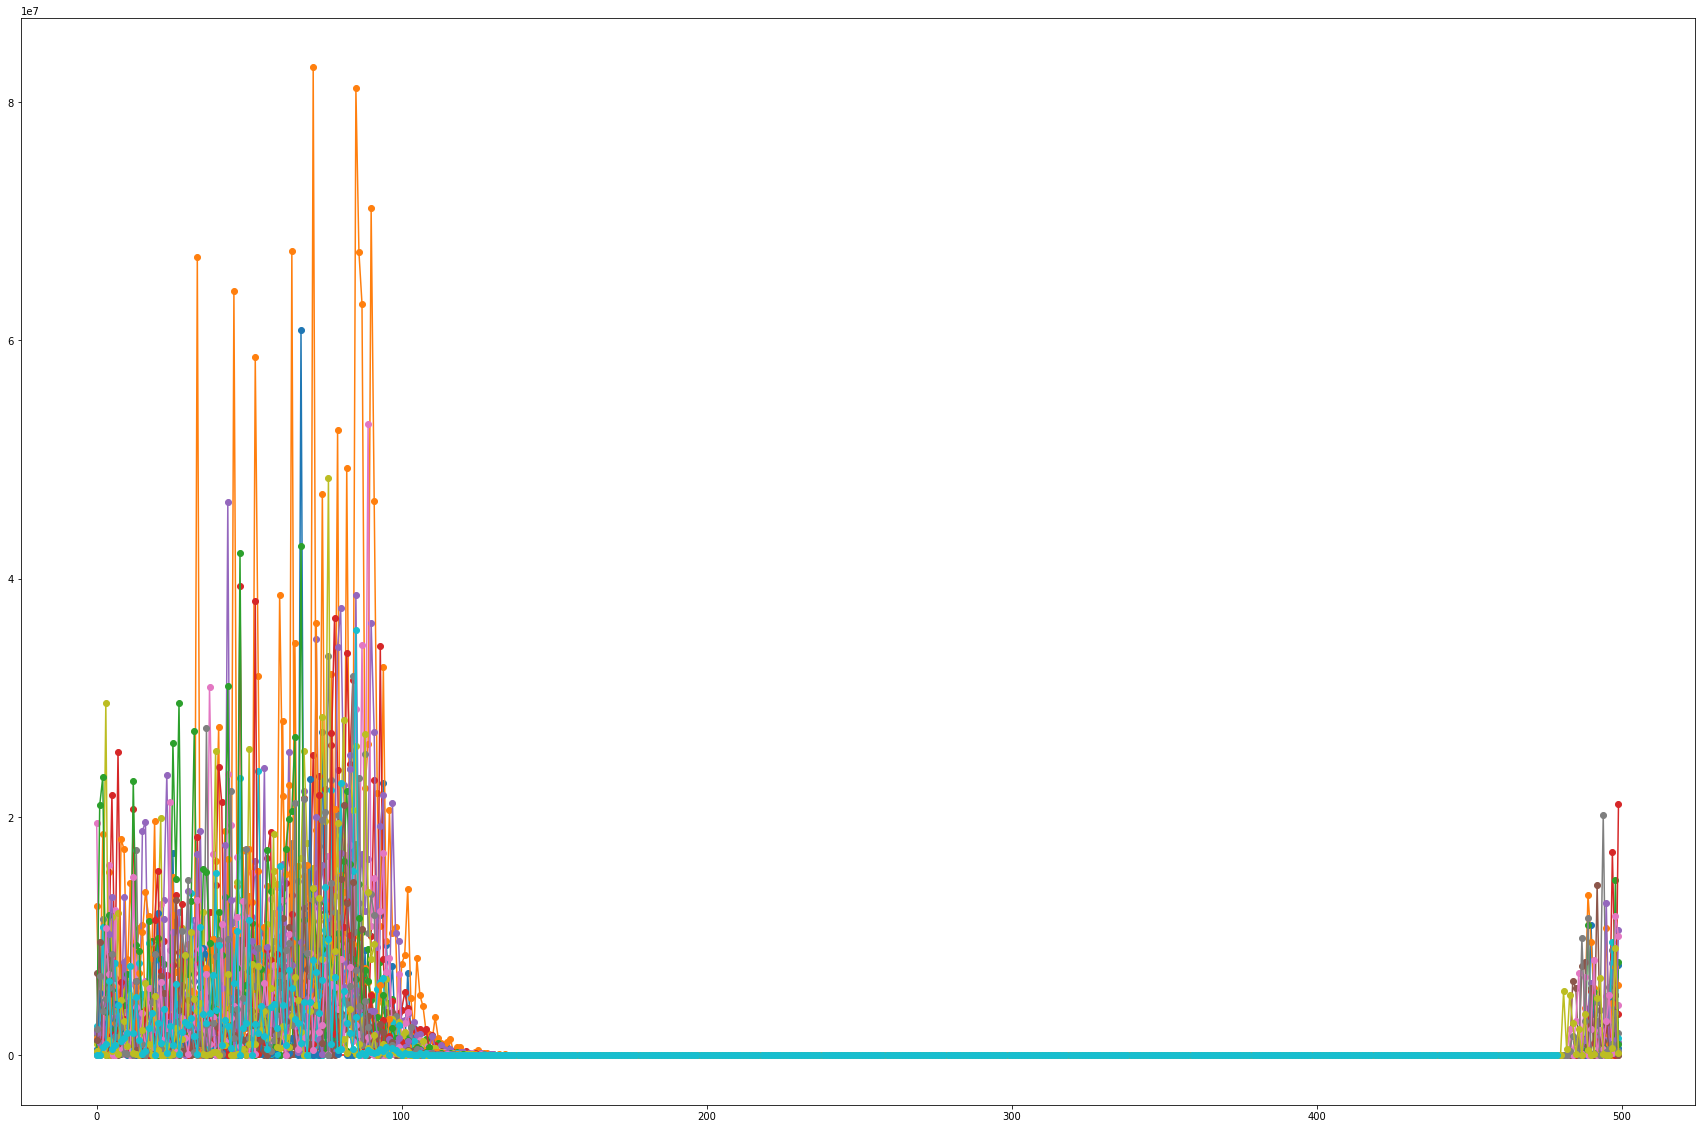

In [32]:
plot_generates(TUR_log["mean.1"])

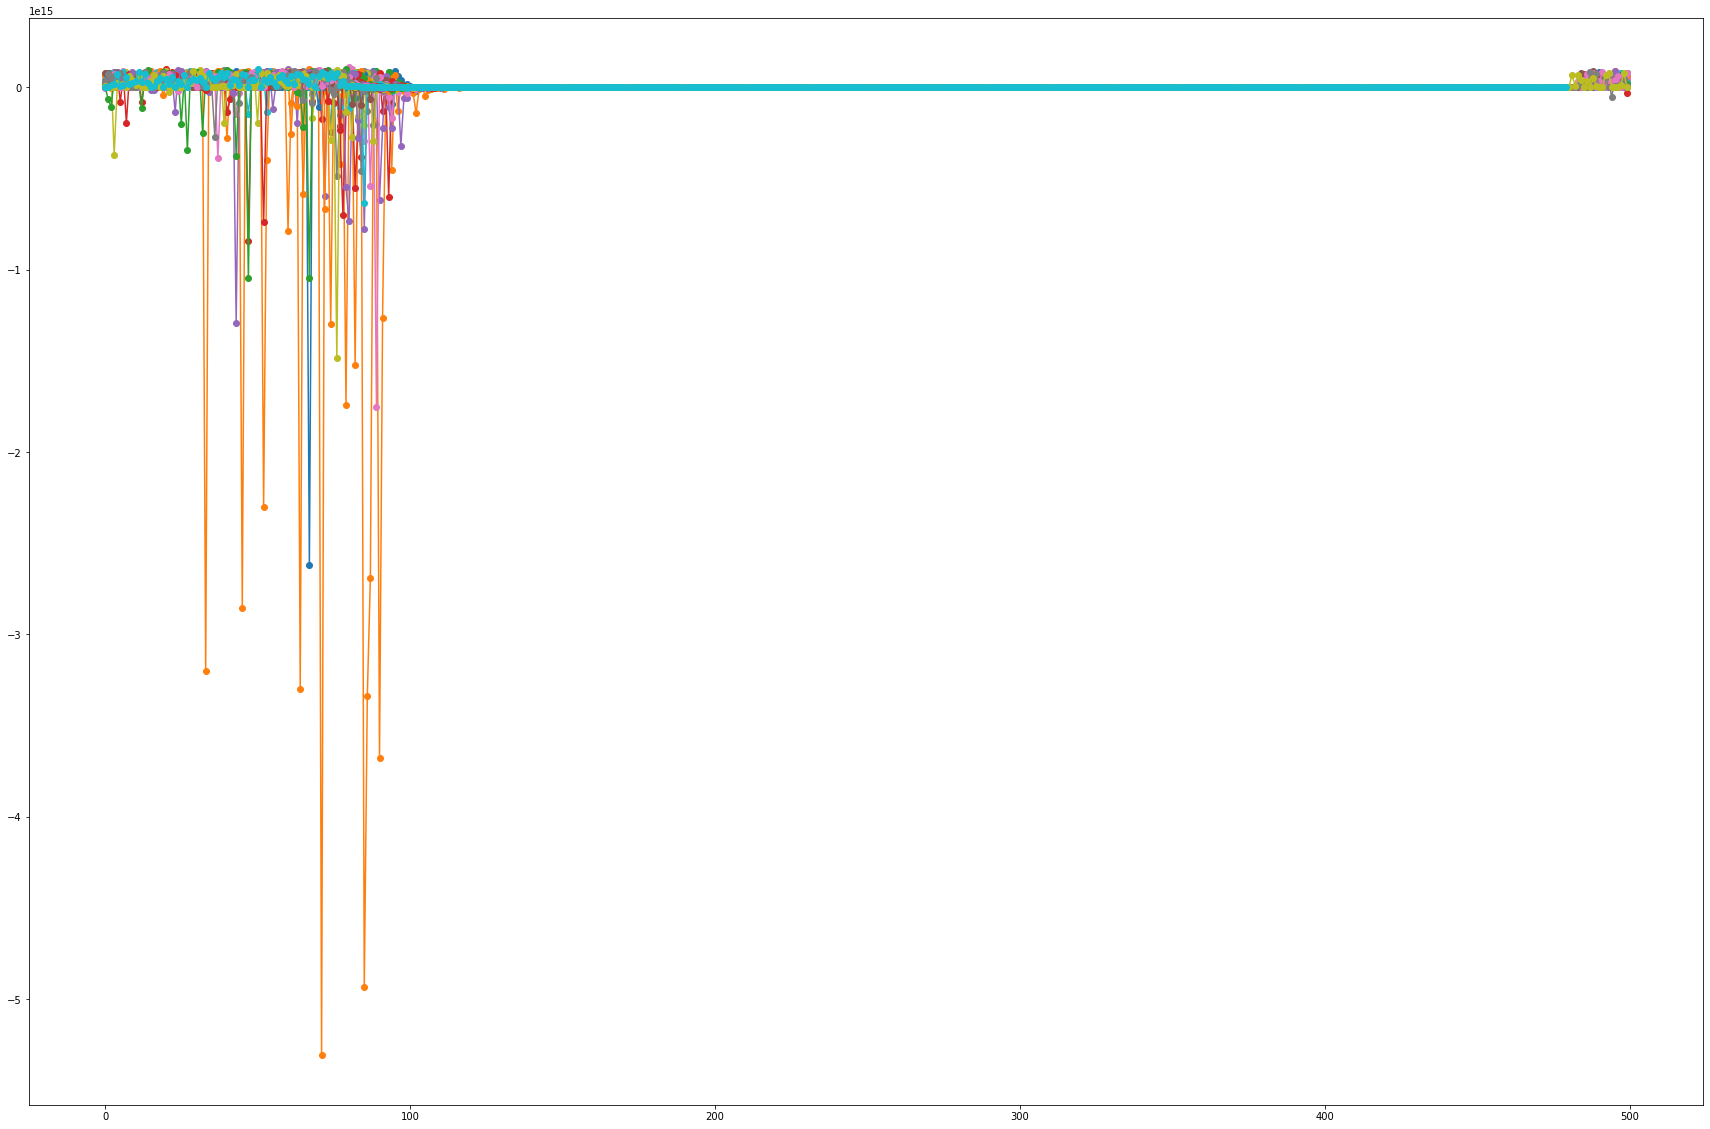

In [33]:
plot_generates(TUR_log["var.1"])

Varianceが負になるのはおかしい